In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

In [2]:
df1 = pd.read_csv('data/camoes_udep.csv', index_col=0,sep=";")

In [3]:
df1

,titulo,autor,ano,genero,ADVCL,ADVMOD,AMOD,APPOS,AUX,CASE,...,PARATAXIS,POBJ,POSS,PRECONJ,PREDET,PUNCT,ROOT,S,SJ,XCOMP
id,,,,,,,,,,,,,,,,,,,,,
1,A virtude laureada,Manoel Maria de Barbosa du Bocage,1805,Drama,21,259,569,8,3,591,...,204,174,92,1,0,300,227,0,0,26
2,Os Pobres,Raul Brandão,1906,Novel,35,411,525,2,19,672,...,235,236,74,2,1,740,506,0,0,61
3,Raios de extincta luz,Antero de Quental,1892,Poetry,41,351,548,5,7,749,...,172,315,80,4,0,544,368,0,0,45
4,Dispersão,Mário Sá-Carneiro,1914,Petry,49,418,416,15,3,610,...,259,209,81,6,0,727,546,0,0,46
5,Cantos Sagrados,Manuel de Arriaga,1899,Poetry,24,272,643,5,10,870,...,130,364,128,1,0,324,253,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Auto da Índia,Gil Vicente,1509,Drama,27,431,497,5,5,367,...,186,120,66,0,0,638,564,0,0,48
192,Farsa de Inês Pereira,Gil Vicente,1523,Drama,48,517,426,6,28,424,...,195,113,64,1,1,616,508,0,0,87
193,A Cidade e a Infância,Luandino Vieira,1960,Tale,40,448,460,10,21,1013,...,139,449,70,0,2,739,664,0,0,48


In [4]:
y = df1.iloc[:,3].values

In [5]:
for x in Counter(y).most_common():
  print(x)

('Tale', 93)
('Novel', 25)
('Short story', 20)
('Chronicle', 16)
('Poetry', 13)
('Drama', 9)
('Essay', 8)
('Poem', 3)
('Petry', 1)
('Other', 1)
('Anthology', 1)
('Narrative', 1)
('Letter', 1)
('Memoirs', 1)
('Script', 1)
('Allegory', 1)


## Filtrando dados

In [6]:
df = df1[df1.genero.isin(["Tale", "Novel", "Short story", "Chronicle", "Poetry"])]

In [7]:
X = df.iloc[:,4:69].values
y = df.iloc[:,3].values

In [8]:
X

array([[ 35, 411, 525, ...,   0,   0,  61],
       [ 41, 351, 548, ...,   0,   0,  45],
       [ 24, 272, 643, ...,   0,   0,  23],
       ...,
       [ 40, 609, 475, ...,   0,   0,  47],
       [ 40, 448, 460, ...,   0,   0,  48],
       [ 29, 363, 460, ...,   0,   0,  64]])

In [9]:
for x in Counter(y).most_common():
  print(x)

('Tale', 93)
('Novel', 25)
('Short story', 20)
('Chronicle', 16)
('Poetry', 13)


## Machine Learning: Random Forests

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Chronicle       0.50      0.33      0.40         3
       Novel       1.00      0.20      0.33         5
      Poetry       1.00      1.00      1.00         3
 Short story       1.00      0.25      0.40         4
        Tale       0.67      0.95      0.78        19

    accuracy                           0.71        34
   macro avg       0.83      0.55      0.58        34
weighted avg       0.77      0.71      0.66        34



## Random Forests Hyperparameter tuning

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [12]:
le = preprocessing.LabelEncoder()
rf = RandomForestClassifier(random_state = 42)

In [13]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [14]:
rf_random = GridSearchCV(
    estimator = rf, 
    param_grid = random_grid, 
    cv = 3, 
    verbose=1, 
    n_jobs = -1,
    scoring='f1_micro'
)

In [15]:
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             scoring='f1_micro', verbose=1)

In [16]:
rf_random.best_score_

0.628896103896104

In [17]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1400}

### Using best parameters

In [18]:
classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    max_features='auto',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=1400, 
    random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Chronicle       0.33      0.33      0.33         3
       Novel       1.00      0.20      0.33         5
      Poetry       1.00      1.00      1.00         3
 Short story       1.00      0.25      0.40         4
        Tale       0.65      0.89      0.76        19

    accuracy                           0.68        34
   macro avg       0.80      0.54      0.56        34
weighted avg       0.75      0.68      0.64        34



In [19]:
from sklearn.model_selection import cross_validate

In [20]:
scores = cross_validate(classifier, X, y, cv=5, scoring=['f1_micro', 'precision_micro', 'recall_micro'])

In [21]:
print(scores)

{'fit_time': array([2.53578091, 2.37249184, 2.37117767, 2.37799716, 2.36094475]), 'score_time': array([0.19857621, 0.19321179, 0.19388533, 0.19087148, 0.1899097 ]), 'test_f1_micro': array([0.64705882, 0.67647059, 0.51515152, 0.72727273, 0.57575758]), 'test_precision_micro': array([0.64705882, 0.67647059, 0.51515152, 0.72727273, 0.57575758]), 'test_recall_micro': array([0.64705882, 0.67647059, 0.51515152, 0.72727273, 0.57575758])}


In [22]:
print("%0.2f f1 micro desvio: %0.2f" % (scores['test_f1_micro'].mean(), scores['test_f1_micro'].std()))
print("%0.2f prec micro desvio: %0.2f" % (scores['test_precision_micro'].mean(), scores['test_precision_micro'].std()))
print("%0.2f rec micro desvio: %0.2f" % (scores['test_recall_micro'].mean(), scores['test_recall_micro'].std()))

0.63 f1 micro desvio: 0.07
0.63 prec micro desvio: 0.07
0.63 rec micro desvio: 0.07


In [23]:
# features names
fn = list(df.columns[4:])

In [24]:
len(fn)

36

In [25]:
# class names
cn = []
for x in y:
  if x not in cn:
    cn.append(x)

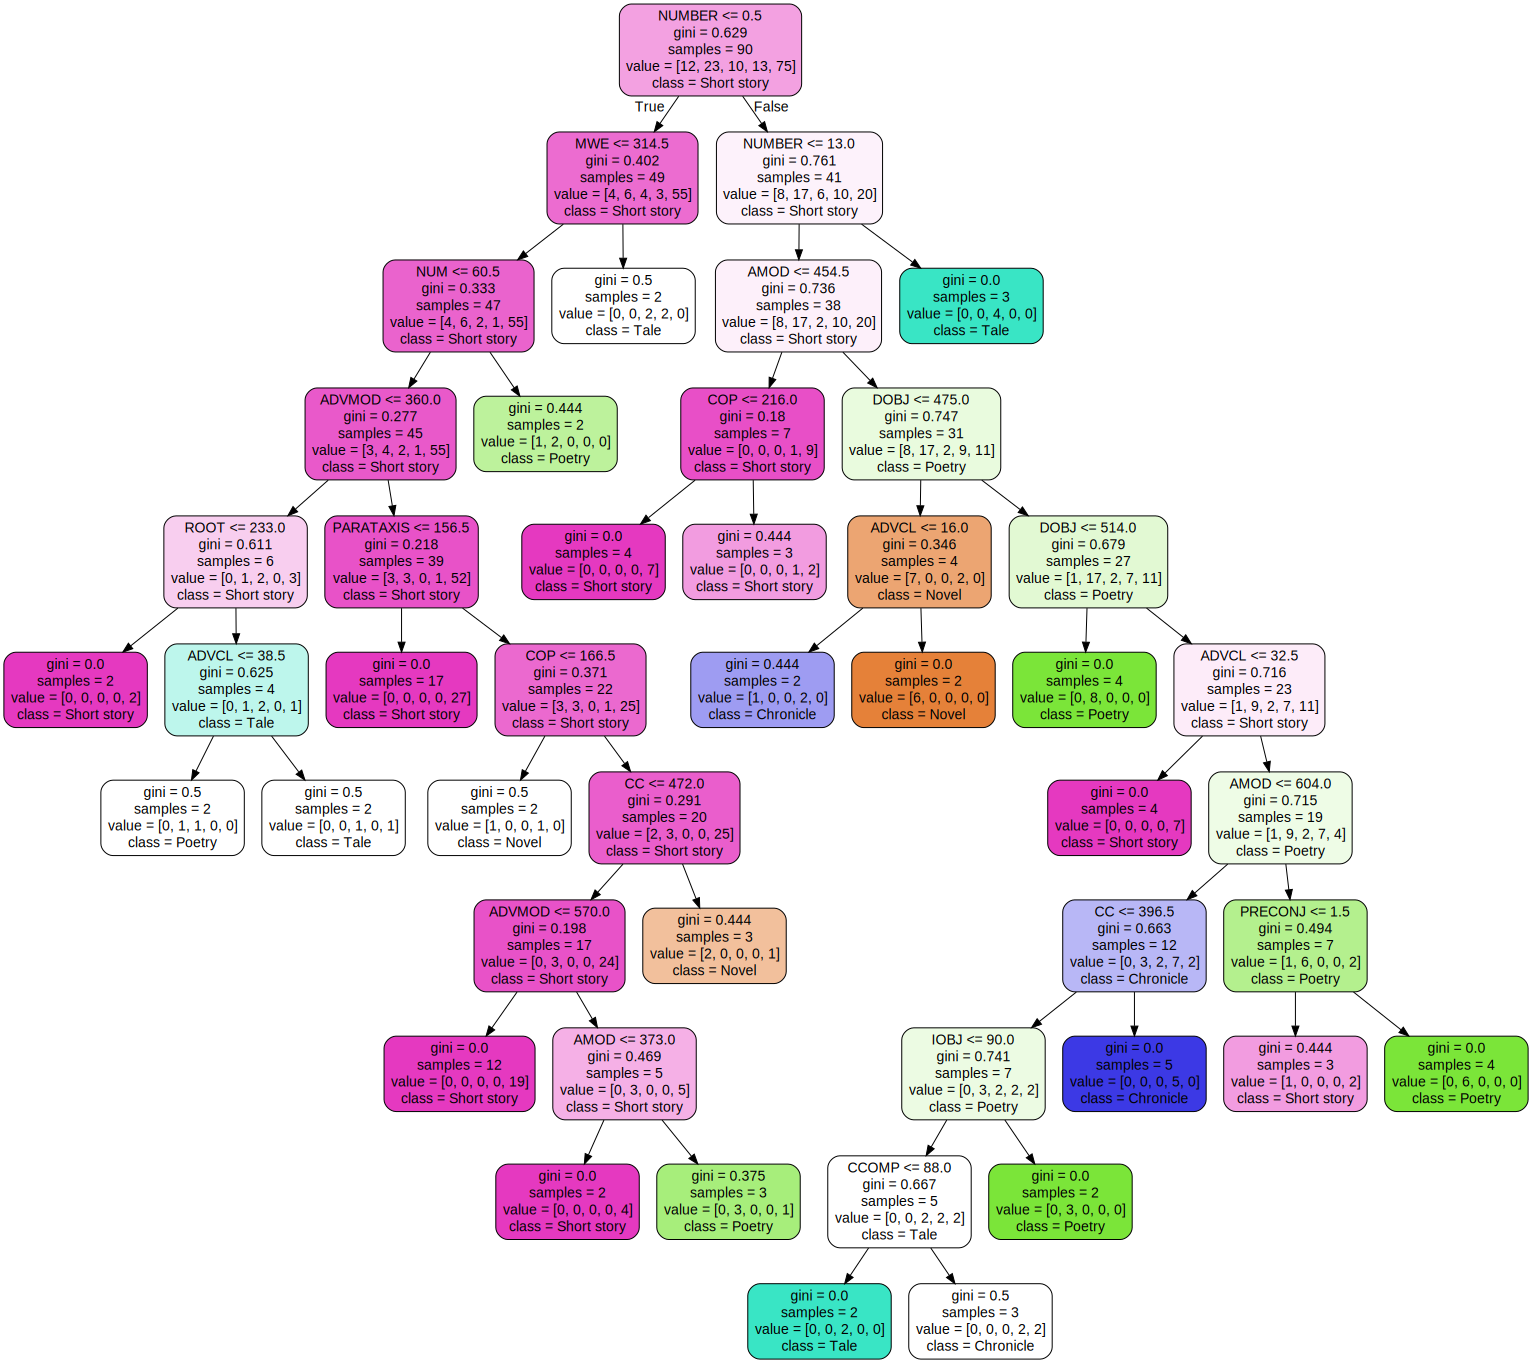

In [26]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(classifier.estimators_[0], 
                           feature_names=fn,
                           class_names=cn, 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph